불러올 페이지 수를 입력하세요 >> 50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


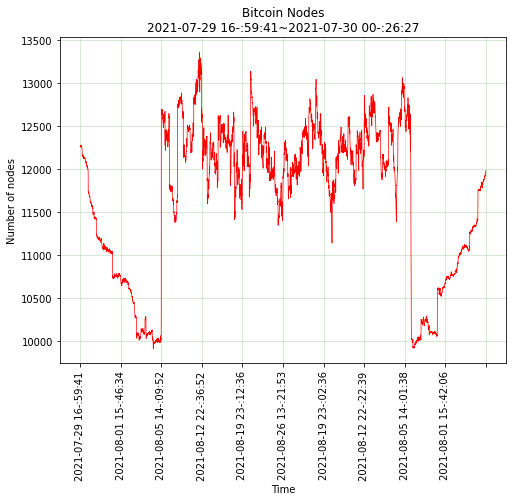

In [18]:
import requests # url 요청
import time # time 변환
import matplotlib.pyplot as plt # 그래프
import matplotlib.ticker as ticker # x축 간격

pages = int(input("불러올 페이지 수를 입력하세요 >> "))
t = [] # 시간
nodes = [] # 활동 중인 노드 수

for page in range(1, pages+1):
  url = "https://bitnodes.io/api/v1/snapshots/?limit=100&page="+str(page) # page당 100개씩 불러옴
  respond = requests.get(url)
  data = respond.json()
  # print(data)
  # print("page %d loaded."%page)

  for i in range(len(data['results'])):
    ts = time.gmtime(data['results'][i]['timestamp']) # 에포크 이후 초 --> UTC의 struct_time
    t.append(time.strftime("%Y-%m-%d %H-:%M:%S", ts)) # gmtime()이나 localtime() 에 의해 반환된 시간을 나타내는 튜플이나 struct_time을 format 인자로 지정된 문자열로 변환합니다.
    nodes.append(data['results'][i]['total_nodes'])

  t = t[::-1] # 역순으로 된 timestamp를 오름차순으로 정렬
  nodes = nodes[::-1] # 시간에 따른 정렬


plt.figure(figsize=(8,6))
plt.plot(t, nodes, color='red', linewidth=0.7)
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
plt.xticks(rotation = 90)
plt.title("Bitcoin Nodes\n"+t[0]+'~'+t[-1])
plt.ylabel("Number of nodes")
plt.xlabel("Time")
plt.grid(color="green",alpha=0.2)
plt.show()